Today in this lesson, we will try to solve the same Titanic problem using Deep Learning i.e. using artificial neural networks.<br>

To recap the problem definition,<br>
In this problem, we have some data about each passenger that were into Titanic ship.<br>
**Our problem is to predict or forecast, whether this person will survive the ship sinking or not**.<br><br>

## Goal of this lesson is to learn basics of deep learning with hands-on experience.

We will follow the same steps as previous lesson to keep it simple.<br>
1. Open the data files.
2. Understand the data. What each column in the table means.
3. Preprocess data
    * Remove the outliers.
    * Fill `NaN` or `null` values. Sometimes, we also remove all the rows with `NaN` values.
    * Feature engineering - Create new columns out of existing columns using our understanding.
    * Converting data into numeric form if it's not.
4. Train a machine learning model.
5. Validate the trained model i.e. checking it's performance on unseen data.
6. If it performs good in validation, use model to predict future real world data.

First of all, let's get familier with Deep Learning.<br>

# What is Deep Learning?
> Deep learning is a subfield of machine learning; which only uses one specific type of model called artificial neural networks to capture patterns & remember them.

![ANN](https://blog.knoldus.com/wp-content/uploads/2017/06/ann-vs-bnn.jpg)
<center>A biological neuron on the left & a simple artificial neural network on the right.</center>
<br><br>
In above figure,
Left part contains our biological brain’s neuron. <br>
Our brain is made from billions of those.<br>
Right part is a sample artificial neural network.<br>
Each circle is a neuron.<br><br>

> In artificial neural networks, each neuron is fully or partially connected with other neurons.<br>

Going from left to right in artificial neural network from the above figure,<br>
First layer is called the “**input**” layer,and the last layer is called the“**output**” layer.<br>
Easy enough.

And middle layers are called “hidden” layers.<br><br>

### Why hidden?<br>
Because they are not visible from outside. Only input & output layers are visible. They are in between input & output layers.<br>

## So, what are artificial neural networks then?
It's kind of a copy of the human brain itself, but on a very tiny scale.<br>
Yes. You read it right.<br>
Core idea of neural networks is inspired by our own biological brain.<br>
Neural networks are, well, network of neurons !<br>
They are called “artificial” as it’s created by humans not biology.<br>
They are not natural.<br>

Each neuron is connected with some other neurons & by this, a network is formed from neurons. Which is called a neural network.

## What is “deep” in deep learning?
We use the term “deep” as there can be multiple middle / hidden layers in a neural network. <br>
So, because of those multiple layers, our network becomes deep.<br>
That’s why people call those neural networks “deep” neural networks.<br>

Deep learning is responsible for exciting technologies like image recognition, natural language processing, speech recognition etc.<br>

### Roots of deep learning field are highly dependent on a branch of mathematics called “[calculus](https://en.wikipedia.org/wiki/Calculus)”.
You might have heard terms like “**differentiation**” or “**integration**” etc. <br>
Those are some things which come under this calculus field.<br>
In deep learning we use differentiation to teach our neural network. <br>
Things get a bit mathematical from this point.<br><br>

### Enough of verbal learning.<br>
Let's learn by code !<br>

## We'll follow the same steps as previous lesson to keep it simple & to allow us to focus on deep learning part.<br>


In [1]:
# import necessary libraries first

# pandas to open data files & processing it.
import pandas as pd
# to see all columns
pd.set_option('display.max_columns', None)

# numpy for numeric data processing
import numpy as np

# sklearn to do preprocessing & ML models
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# keras for deep learning model creation
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import plot_model

# Matplotlob & seaborn to plot graphs & visulisation
import matplotlib.pyplot as plt 
import seaborn as sns

# for fixing the random seed
import random
import os, tensorflow as tf
import torch

# ignore warnings
import warnings
warnings.simplefilter(action='ignore')

Using TensorFlow backend.


# 1. Open the data files.

In [2]:
titanic_data = pd.read_csv("../input/titanic/train.csv")
titanic_data.shape

(891, 12)

So, we have total of 891 rows & 12 columns

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Understand the data. What each column in the table means.

**Each row in above table contains data of a passenger.<br>**
Those details include following columns.<br>

Here is all the columns of above table mean.<br>

`PassengerId` : Unique ID for each passenger.<br><br>
`Survived` : Whether that passenger survived or not. (0 = No, 1 = Yes)<br><br>
`Pclass` : Ticket class of passenger. (1 = Upper, 2 = Middle, 3 = Lower)<br><br>
`Name` : Name of passenger<br><br>
`Sex` : Gender of passenger<br><br>
`Age` : Age of passenger<br><br>
`SibSp` : # of siblings / spouses aboard the Titanic of passenger<br><br>
`Parch` : # of parents / children aboard the Titanic of passenger<br><br>
`Ticket` : Ticket number of passenger<br><br>
`Fare` : Ticket amount / passenger fare.<br><br>
`Cabin` : Cabin number of passenger<br><br>
`Embarked` : Port of Embarkation of passenger. (C = Cherbourg, Q = Queenstown, S = Southampton)<br><br>

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Let's check unique values for each column

In [5]:
# Survival
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

So, total 335 people have survived & 547 people have died in the Titanic.

In [6]:
# Ticket class
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

This tells `3` value occurs 491 times, `1` value occurs 207 times etc.

In [7]:
# Gender
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
# Siblings
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
# Parent or Childs
titanic_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
# Embarked station
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Most of the passengers have embarked from "Cherbourg" & "Southampton"

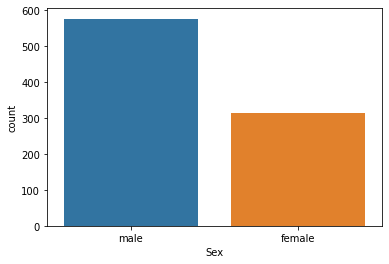

In [11]:
sns.countplot(titanic_data['Sex']);

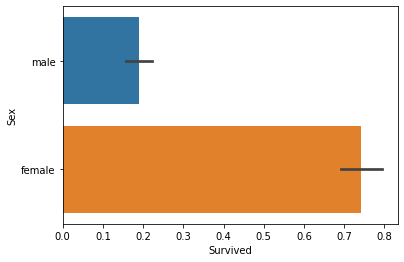

In [12]:
sns.barplot(titanic_data['Survived'], titanic_data['Sex']);

Wow !<br>
~75% of females have survived.<br>
Even if total number of females are less than males.<br><br>

May be because, females were given more priority in lifeboats than males. May be.

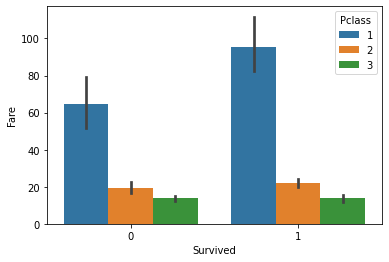

In [13]:
sns.barplot(titanic_data['Survived'], titanic_data['Fare'], titanic_data['Pclass']);

People with higher class have higher chances of survival !

# 3. Preprocess data

In preprocessing step, we detect outliers & remove them from our data.

## 3.1

## What is an outlier in data? Why does it occur?
Outliers are as the name suggests, very different from general / normal trend.<br>
They occur in data because of some faults in data collection pipeline.<br><br>

## Why we generally remove outliers?
Because one big outlier can mess up whole model's performance.<br>
Even if all other contributions might be of a low value, one high outlier value already shifts the entire gradient towards higher values as well.<br>

Most of the time, we remove outliers so that, we can train our model only from general trends.<br>
Let's see some examples using our titanic data.<br>

### One common practice followed to detect outliers is BoxPlot.

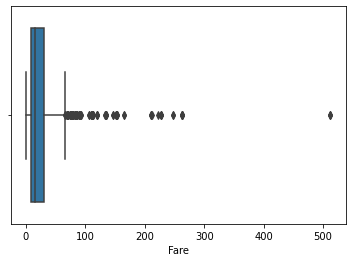

In [14]:
sns.boxplot(x=titanic_data["Fare"])
plt.show()

We can see, for majority of passengers, `Fare` price is less than 250.<br>
So, let's only keep the rows with `Fare` < 250.

In [15]:
# Only take rows which have "Fare" value less than 250.
titanic_data = titanic_data[titanic_data['Fare'] < 250]
titanic_data.shape

(882, 12)

So, we have removed 9 rows.<br>Originally, there were 891 rows.

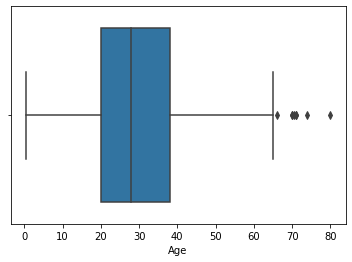

In [16]:
sns.boxplot(x=titanic_data["Age"])
plt.show()

## 3.2 Fill NaN or null values in data

### Why NaN (not a number) values occur in data?
Sometimes, while collecting data, if some information is missing for some rows, it's filled as NaN.<br>
It means nothing is there.<br>
It's empty.<br>

### How NaN values can be handled?
There are several methods.
* Fill a specified value like "EMPTY" or -1 for all the NaN values.
    * This option is good for categorical type columns / features.
* If column is numeric in nature, fill with mean or median of that specific column.
    * This option is good for numerical type columns / features.
* Remove all the raws who have atleast 1 NaN value in any column.
    * If total number of raws with NaN values is less, we can just remove those rows from our data.

Let's look if there are any missing values in our data.

In [17]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

There are 177 NaN values in Age & 686 NaN values in Cabin column.<br>
In Cabin more than 75% values are empty.<br>
So, we will just remove that column.

In [18]:
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_data.shape

(882, 11)

In [19]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

We can see `Cabin` column is removed from our data.<br><br>
Now, `Age` is a numeric column.<br>
So, let's fill NaN values by mean of all the other non-NaN values.

In [20]:
age_mean = titanic_data['Age'].mean()
print(age_mean)

29.68818439716312


We can fill all the NaN values using `fillna` 

In [21]:
titanic_data['Age'].fillna(age_mean, inplace=True)

In [22]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

There are just 2 NaN values in `Embarked` column.<br>
We handle NaN values in `Embarked` column by filling most occuring value in that column.

In [23]:
titanic_data['Embarked'].value_counts()

S    640
C    163
Q     77
Name: Embarked, dtype: int64

In [24]:
titanic_data['Embarked'].fillna("S", inplace=True)

In [25]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now, we can see, no NaN values are there in our whole data.

Next step is **Feature Engineering**

## 3.3

### What is Feature Engineering?
> Feature Engineering is creating more meaningful data out of existing data using our domain knowledge & comman sense.<br>

In other words, we try to create more relevant information for our ML models. <br>
So, that our model can capture patterns in faster & better ways.

### Now, this is a creative step. We need to use brain to create relevant features in the data.

Let's think.

In [26]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


Let's once again look at what we have at hand.<br><br><br>
`PassengerId` : Unique ID for each passenger.<br><br>
`Survived` : Whether that passenger survived or not. (0 = No, 1 = Yes)<br><br>
`Pclass` : Ticket class of passenger. (1 = Upper, 2 = Middle, 3 = Lower)<br><br>
`Name` : Name of passenger<br><br>
`Sex` : Gender of passenger<br><br>
`Age` : Age of passenger<br><br>
`SibSp` : # of siblings / spouses aboard the Titanic of passenger<br><br>
`Parch` : # of parents / children aboard the Titanic of passenger<br><br>
`Ticket` : Ticket number of passenger<br><br>
`Fare` : Ticket amount / passenger fare.<br><br>
`Embarked` : Port of Embarkation of passenger. (C = Cherbourg, Q = Queenstown, S = Southampton)<br><br>

### How can we use these columns to create more relevant information?

Let's use `SibSp` & `Parch` to create a `total_family_members` feature.

In [27]:
titanic_data['total_family_members'] = titanic_data['Parch'] + titanic_data['SibSp'] + 1

# if total family size is 1, person is alone.
titanic_data['is_alone'] = titanic_data['total_family_members'].apply(lambda x: 0 if x > 1 else 1)

titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0


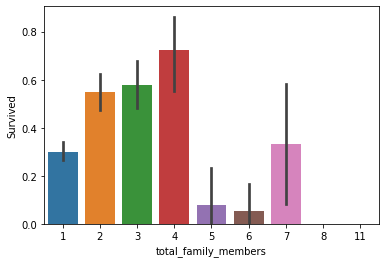

In [28]:
sns.barplot(titanic_data['total_family_members'], titanic_data['Survived'])

Interesting.<br>
People with total_family_members = 4 have more than 70% chances of survival !<br><br>

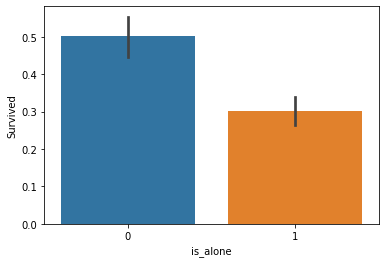

In [29]:
sns.barplot(titanic_data['is_alone'], titanic_data['Survived'])

People with family have 20% higher chance of survival than people travelling alone !!

`Age` column also can be used to create partitions.<br>
We can use `apply` function to `Age` column to create new column `age_group`<br>
Like..

In [30]:
def age_to_group(age):
    if 0 < age < 12:
        # children
        return 0
    elif 12 <= age < 50:
        # adult
        return 1
    elif age >= 50:
        # elderly people
        return 2
    
titanic_data['age_group'] = titanic_data['Age'].apply(age_to_group)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1,1
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0,1


### Why this age_group feature is useful ?
Let's see..

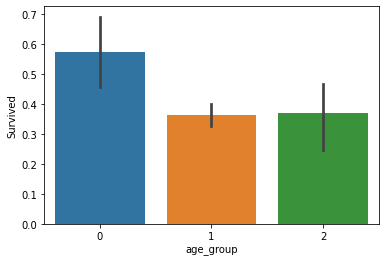

In [31]:
sns.barplot(titanic_data['age_group'], titanic_data['Survived']);

`0` i.e. children have higher survival rate compared to adults & elderly people.<br>
This data may become useful to our model.<br>

### Can you think of any way we can use `name` column ?
We can capture name title like Mr. Ms. Miss. etc.

In [32]:
titanic_data['name_title'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,1,Mr


In [33]:
titanic_data['name_title'].value_counts()

Mr          513
Miss        177
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Lady          1
Sir           1
Countess      1
Jonkheer      1
Capt          1
Ms            1
Mme           1
Name: name_title, dtype: int64

In [34]:
def clean_name_title(val):
    if val in ['Rev', 'Col', 'Mlle', 'Mme', 'Ms', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Countess', 'Capt']:
        return 'RARE'
    else:
        return val

titanic_data['name_title'] = titanic_data['name_title'].apply(clean_name_title)
titanic_data['name_title'].value_counts()

Mr        513
Miss      177
Mrs       125
Master     40
RARE       18
Dr          7
Major       2
Name: name_title, dtype: int64

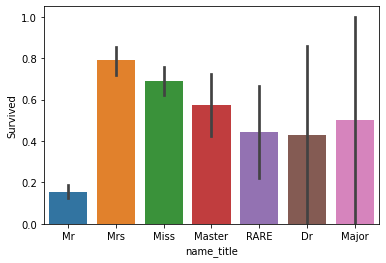

In [35]:
sns.barplot(titanic_data['name_title'], titanic_data['Survived']);

People with `Mrs` & `Miss` titles i.e. females have high chances of survival.<br>
But in males, with `Master` title, you have higher chances of survival !<br><br>

In [36]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1,1,Mr
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1,2,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0,1,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0,1,Mrs


Let's drop columns which are not useful to us as of now.<br>

In [37]:
# save the target column 
target = titanic_data['Survived'].tolist()

titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1, inplace=True)

In [38]:
titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,3,male,22.0,1,0,7.2500,S,2,0,1,Mr
1,1,female,38.0,1,0,71.2833,C,2,0,1,Mrs
2,3,female,26.0,0,0,7.9250,S,1,1,1,Miss
3,1,female,35.0,1,0,53.1000,S,2,0,1,Mrs
4,3,male,35.0,0,0,8.0500,S,1,1,1,Mr


## 3.4 Convert all the data into numeric form

We can see, `Sex`, `Embarked` & `name_title` are not in numeric form.<br>
Let's convert them via LabelEncoder from sci-kit learn.

In [39]:
le = preprocessing.LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])
titanic_data['name_title'] = le.fit_transform(titanic_data['name_title'])
titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,3,1,22.0,1,0,7.2500,2,2,0,1,4
1,1,0,38.0,1,0,71.2833,0,2,0,1,5
2,3,0,26.0,0,0,7.9250,2,1,1,1,3
3,1,0,35.0,1,0,53.1000,2,2,0,1,5
4,3,1,35.0,0,0,8.0500,2,1,1,1,4


## One-hot encoding
For deep learning models, it's a commmmon practice to convert `categorical` features / columns to one-hot encoding format.<br>

![one-hot](https://i.imgur.com/mtimFxh.png)

One-hot encoding makes data sparse.<br>
It helps neural networks to look at features individually.<br><br>

We have `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`, `total_family_members`, 	`is_alone`, `age_group`, `name_title` categorical features.<br>
Let's do one-hot encoding for them.

In [40]:
titanic_data = pd.get_dummies(titanic_data, columns=["Pclass", "Sex", "SibSp", "Parch", "Embarked", "total_family_members", "is_alone", "age_group", "name_title"])

In [41]:
titanic_data.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_0,Embarked_1,Embarked_2,total_family_members_1,total_family_members_2,total_family_members_3,total_family_members_4,total_family_members_5,total_family_members_6,total_family_members_7,total_family_members_8,total_family_members_11,is_alone_0,is_alone_1,age_group_0,age_group_1,age_group_2,name_title_0,name_title_1,name_title_2,name_title_3,name_title_4,name_title_5,name_title_6
0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
3,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


We can see above, we have a seprate column for each unique values for each `categorical` feature.<br><br>

Now, let's scale numerical features.<br>

## Feature scaling

Feature scaling becomes useful in deep learning for neumerical features.<br>
We do feature scaling to make all the columns of uniform scaling.<br>
In other words, to convert all the feature in same scale by removing unit part of it.<br><br>
Sometimes, it also helps in speeding up the calculations in an algorithm.

In [42]:
mm = preprocessing.MinMaxScaler(feature_range=(-1, 1))
titanic_data['Age'] = mm.fit_transform(titanic_data['Age'].to_numpy().reshape(-1, 1))
titanic_data['Fare'] = mm.fit_transform(titanic_data['Fare'].to_numpy().reshape(-1, 1))
titanic_data.head(10)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_0,Embarked_1,Embarked_2,total_family_members_1,total_family_members_2,total_family_members_3,total_family_members_4,total_family_members_5,total_family_members_6,total_family_members_7,total_family_members_8,total_family_members_11,is_alone_0,is_alone_1,age_group_0,age_group_1,age_group_2,name_title_0,name_title_1,name_title_2,name_title_3,name_title_4,name_title_5,name_title_6
0,-0.457653,-0.941419,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-0.055542,-0.424022,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-0.357125,-0.935965,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
3,-0.130937,-0.570945,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,-0.130937,-0.934955,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
5,-0.264434,-0.931656,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
6,0.346569,-0.580944,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
7,-0.960292,-0.829711,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
8,-0.331993,-0.910041,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
9,-0.658708,-0.757024,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


Now, we have everything in numbers !!

# 4. Train a machine learning model.



In [43]:
train_data, val_data, train_target, val_target = train_test_split(titanic_data, target, test_size=0.2)
train_data.shape, val_data.shape, len(train_target), len(val_target)

((705, 45), (177, 45), 705, 177)

We have our training data & validation data.<br>
We have randomly choosen 20% of the all the rows on which we will check our model's performance.<br>

### Now, let's create a neural network..

In [44]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    tf.random.set_seed(seed)

# We fix all the random seed so that, we can reproduce the results.
seed_everything(2020)

In [45]:
input_layer = Input(shape=(titanic_data.shape[1],),name='input_layer')
hidden_layer_1 = Dense(32, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(16, activation = 'relu')(hidden_layer_1)
output_layer = Dense(1, activation = 'sigmoid')(hidden_layer_2)

model = Model(input=input_layer, output=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 45)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1472      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________


There are total `2017` parameters in our model which we will tune while back-propagation.

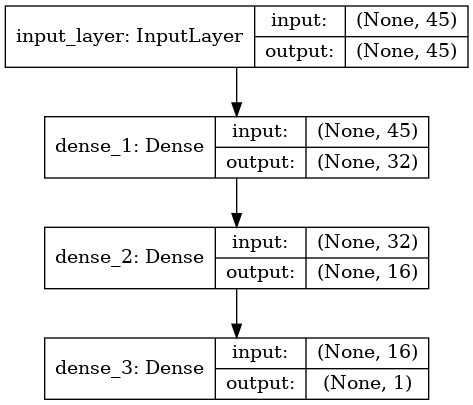

In [46]:
plot_model(model, show_shapes=True)

This is our simple neural network.<br><br>

We have 1 input layer, 2 hidden layer, 1 output layer.<br>

### Via input_layer, data will go in & from output_layer, we will get the prediction from our neural network.

### Let's give training to our neural network now.


In [47]:
# We will give training 10 times with the same data.
EPOCHS = 10

# We will process 64 rows at a time.
BATCH_SIZE = 32

model.fit(
        train_data, train_target,
        nb_epoch=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(val_data, val_target),
        verbose = 1,
)

Train on 705 samples, validate on 177 samples
Epoch 1/10
705/705 [==============================] - 0s 663us/step - loss: 0.6169 - accuracy: 0.6894 - val_loss: 0.5779 - val_accuracy: 0.6780
Epoch 2/10
705/705 [==============================] - 0s 60us/step - loss: 0.5600 - accuracy: 0.7461 - val_loss: 0.5197 - val_accuracy: 0.7853
Epoch 3/10
705/705 [==============================] - 0s 61us/step - loss: 0.5122 - accuracy: 0.7858 - val_loss: 0.4786 - val_accuracy: 0.7966
Epoch 4/10
705/705 [==============================] - 0s 61us/step - loss: 0.4822 - accuracy: 0.7986 - val_loss: 0.4523 - val_accuracy: 0.8079
Epoch 5/10
705/705 [==============================] - 0s 60us/step - loss: 0.4649 - accuracy: 0.8142 - val_loss: 0.4434 - val_accuracy: 0.8305
Epoch 6/10
705/705 [==============================] - 0s 61us/step - loss: 0.4511 - accuracy: 0.8213 - val_loss: 0.4327 - val_accuracy: 0.8362
Epoch 7/10
705/705 [==============================] - 0s 60us/step - loss: 0.4391 - accuracy: 0

Training is done.<br>
We have trainied our neural network model.<br><br>

# 5. Validate the trained model i.e. checking it's performance on unseen data.

It's called "unseen" because our ML model have never seen this data.<br>
It's kind of a test for it.<br>
Where it's performance will be checked on data which it have never seen or train.

In [48]:
# Predict labels on Validation data which model have never seen before.

val_predictions = model.predict(val_data)
len(val_predictions)

177

In [49]:
# first 10 values of validation_predictions
val_predictions[:10]

array([[0.1125026 ],
       [0.10729357],
       [0.11291455],
       [0.3005235 ],
       [0.893504  ],
       [0.41810104],
       [0.19545786],
       [0.6368603 ],
       [0.2913892 ],
       [0.2987141 ]], dtype=float32)

We can see our predictions are in float.<br>
Let's convert them into integers.<br>

In [50]:
val_predictions1 = [1 if x >= 0.5 else 0 for x in val_predictions]
val_predictions1[:10]

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]

In [51]:
# Calculate the accuracy score on validation data.
# We already have correct target information for them.

accuracy = accuracy_score(val_target, val_predictions1)
accuracy

0.8361581920903954

## Cool !!

In [52]:
print("We got %.3f percent accuracy on our validation unseen data !!"%(accuracy*100))

We got 83.616 percent accuracy on our validation unseen data !!


There's a lot can be done to improve this neural network model.<br>
We have build a very basic neural network model to solve this problem.<br>
But for an introduction lesson, this much is enough as of now.

# 6. If it performs good in validation, use model to predict future real world data.

### Now, we can use this model to other people & predict if they were on Titanic ship in 1912 !! 

# Summary

So, in this lesson, we saw, what a typical pipeline looks like in solving a machine learning(ML) problem.

1. Open the data files.
2. Understand the data. What each column in the table means.
3. Preprocess data
    * Remove the outliers.
    * Fill `NaN` or `null` values. Sometimes, we also remove all the rows with `NaN` values.
    * Feature engineering - Create new columns out of existing columns using our understanding.
    * Converting data into numeric form if it's not.
4. Train a machine learning model.
5. Validate the trained model i.e. checking it's performance on unseen data.
6. If it performs good in validation, use model to predict future real world data.

## Upvote this kernel if you have learned something from it.
## Tell me if you have any kind of doubts / questions in comment section below.

## In next lesson we will understand Convolutional Neural Networks(CNNs) from scratch in detail with full Python code.
## See you in the [next lesson](https://www.kaggle.com/prashantkikani/is-it-a-cat-or-dog-convolutional-nn) 👋